<a href="https://colab.research.google.com/github/ewuerfel66/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/EricWuerfel_LS_DS5_112_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

    Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
        Make sure that your dataset has the number of rows and columns that you expect.
        Make sure that your dataset has appropriate column names, rename them if necessary.
        If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
    Identify and fill missing values in your dataset (if any)
        Don't worry about using methods more advanced than the .fillna() function for today.
    Create one of each of the following plots using your dataset
        Scatterplot
        Histogram
        Density Plot
        Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [0]:
import pandas as pd
from statistics import median, mean

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version1

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.names

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version1', header = None)
df.columns = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen']
df.head()

,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen
0,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


In [24]:
df.dtypes

one         object
two         object
three       object
four         int64
five        object
six         object
seven       object
eight       object
nine        object
ten         object
eleven      object
twelve      object
thirteen    object
dtype: object

In [7]:
df.six.loc[0]

'?'

In [9]:
df_nan = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version1', header = None, na_values='?')
df_nan.columns = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen']
df_nan.head()

,one,two,three,four,five,six,seven,eight,nine,ten,eleven,twelve,thirteen
0,E1,M,3.0,1818,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
1,E2,A,25.0,1819,HIGHWAY,1037.0,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
2,E3,A,39.0,1829,AQUEDUCT,NaN,1.0,N,THROUGH,WOOD,NaN,S,WOOD
3,E5,A,29.0,1837,HIGHWAY,1000.0,2.0,N,THROUGH,WOOD,SHORT,S,WOOD
4,E6,M,23.0,1838,HIGHWAY,NaN,2.0,N,THROUGH,WOOD,NaN,S,WOOD


In [0]:
six_clean = df_nan.six.dropna()
six_median = median(six_clean)
print(six_median)
df_nan.six.fillna(six_median)

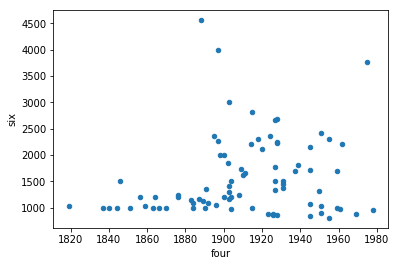

In [21]:
df_nan.plot.scatter('four', 'six');

In [0]:
df_nan